In [29]:
%matplotlib notebook

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [31]:
# File to Load (Remember to change these)
city_data_to_load = "./city_data.csv"
ride_data_to_load = "./ride_data.csv"

In [32]:
# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [33]:
# Combine the data into a single dataset
pyber_data_complete = pd.merge(ride_data_df,city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_complete.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


 Bubble Plot of Ride Sharing Data

In [34]:
# Obtain the x and y coordinates for each of the three city types
x_axis = np.arange(len(pyber_data_complete))

urban=pyber_data_complete[(pyber_data_complete["type"] == "Urban")]
urban_group=urban.groupby(["city"])
urban_x=urban_group["ride_id"].count()
urban_y=urban_group["fare"].mean()
urban_s=urban_group["driver_count"].mean()

suburban=pyber_data_complete[(pyber_data_complete["type"] == "Suburban")]
suburban_group=suburban.groupby(["city"])
suburban_x=suburban_group["ride_id"].count()
suburban_y=suburban_group["fare"].mean()
suburban_s=suburban_group["driver_count"].mean()

rural=pyber_data_complete[(pyber_data_complete["type"] == "Rural")]
rural_group=rural.groupby(["city"])
rural_x=rural_group["ride_id"].count()
rural_y=rural_group["fare"].mean()
rural_s=rural_group["driver_count"].mean()

<IPython.core.display.Javascript object>


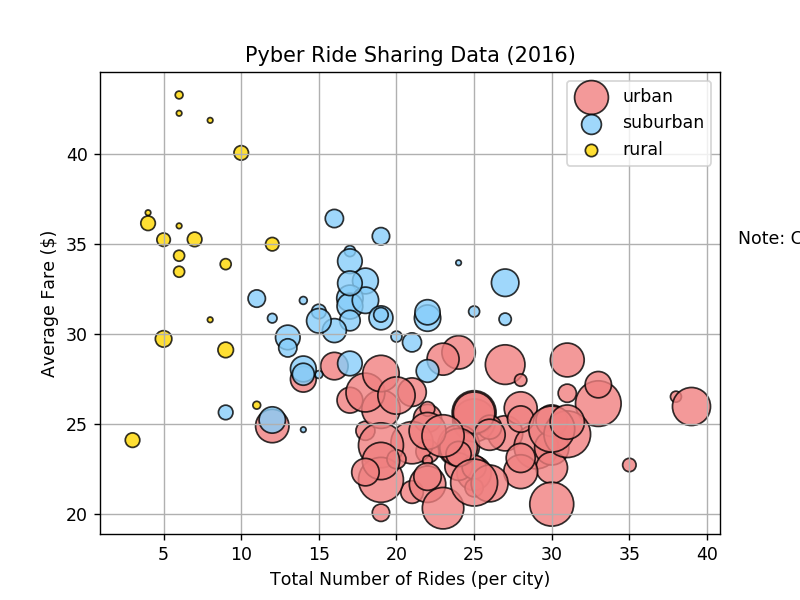

In [35]:
#x = (urban_x, suburban_x, rural_x)
#y = (urban_y, suburban_y, rural_y)
#Z = (urban_s,suburban_s,rural_s)
#colors = ["lightcoral","gold","lightskyblue"]
#groups = ("urban", "suburban", "rural")


# Build the scatter plots for each city types
#plt.close()

plt.scatter(urban_x, urban_y, s=urban_s*10, alpha=0.8, c='lightcoral', edgecolors='black', label="urban")
plt.scatter(suburban_x, suburban_y, s=suburban_s*10, alpha=0.8, c='lightskyblue', edgecolors='black', label="suburban")
plt.scatter(rural_x, rural_y, s=rural_s*10, alpha=0.8, c='gold', edgecolors='black', label="rural")
 

# Incorporate the other graph properties
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (per city)')
plt.ylabel('Average Fare ($)')
plt.grid(True)


# Create a legend
plt.legend(loc="best")
plt.show()

# Incorporate a text label regarding circle size
plt.text(42,35,"Note: Circle Sizes correlates with driver count per city")

# Save Figure
plt.savefig("./Images/Pyber_BubblePlot_RideShareData.png")

In [36]:
 # Show plot
plt.show()

 Total Fares by City Type

In [37]:
# Calculate Type Percents

total_types=pyber_data_complete["fare"].sum()

urban=pyber_data_complete[(pyber_data_complete["type"] == "Urban")]
urban_ct=urban["fare"].sum()
urban_pct= urban_ct / total_types *100

suburban=pyber_data_complete[(pyber_data_complete["type"] == "Suburban")]
suburban_ct=suburban["fare"].sum() 
suburban_pct= suburban_ct / total_types *100

rural=pyber_data_complete[(pyber_data_complete["type"] == "Rural")]
rural_ct=rural["fare"].sum() 
rural_pct= rural_ct / total_types *100

print(total_types)
print(urban_pct)
print(suburban_pct)
print(rural_pct)

63538.64
62.72463496228438
30.46387206273222
6.81149297498341


<IPython.core.display.Javascript object>


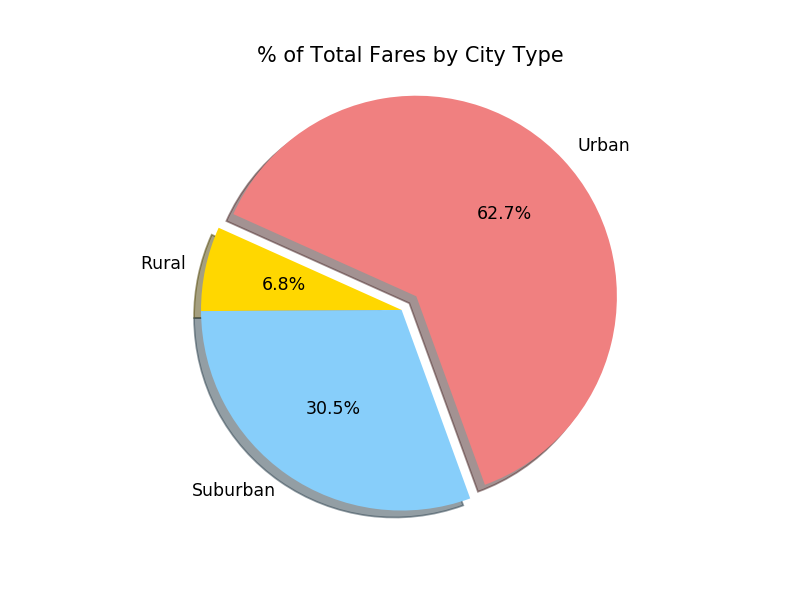

In [38]:
# Build Pie Chart
labels = 'Urban','Rural', 'Suburban', 
sizes = [urban_pct,rural_pct,suburban_pct]
colors = ["lightcoral","gold","lightskyblue"]
explode = (0.1, 0, 0)  # only "explode" the Urban slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',colors=colors,
        shadow=True, startangle=290)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('% of Total Fares by City Type')

# Save Figure
plt.savefig("./Images/Pyber_TotalFairs_PieChart.png")
plt.show()


 Total Rides by City Type

In [39]:
# Calculate Type Percents
total_rides=pyber_data_complete["ride_id"].count()

urban_tr=pyber_data_complete[(pyber_data_complete["type"] == "Urban")]
urban_trct=urban_tr["ride_id"].count()
urban_trpct= urban_trct / total_rides *100

suburban_tr=pyber_data_complete[(pyber_data_complete["type"] == "Suburban")]
suburban_trct=suburban_tr["ride_id"].count() 
suburban_trpct= suburban_trct / total_rides *100

rural_tr=pyber_data_complete[(pyber_data_complete["type"] == "Rural")]
rural_trct=rural_tr["ride_id"].count() 
rural_trpct= rural_trct / total_rides *100

print(total_types)
print(urban_trpct)
print(suburban_trpct)
print(rural_trpct)

63538.64
68.42105263157895
26.31578947368421
5.263157894736842


<IPython.core.display.Javascript object>


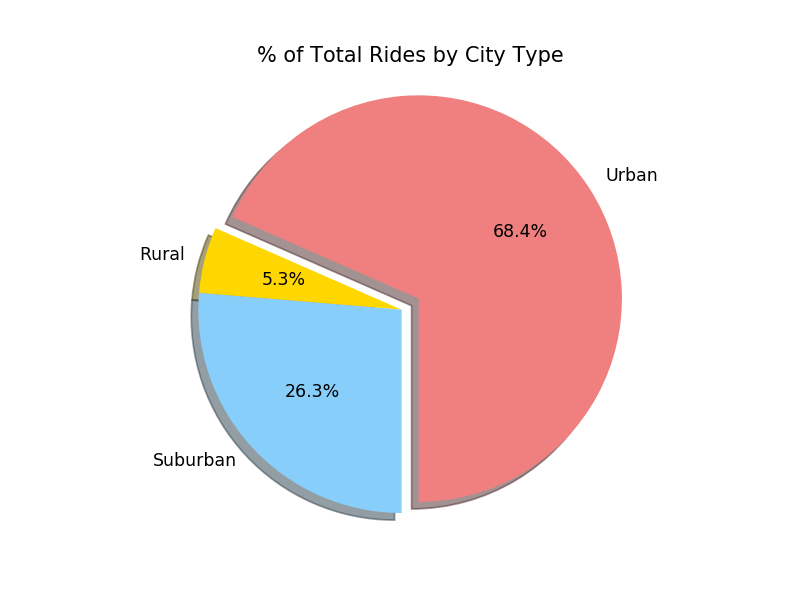

In [40]:
# Build Pie Chart
labels = 'Urban','Rural', 'Suburban', 
sizes = [urban_trpct,rural_trpct,suburban_trpct]
colors = ["lightcoral","gold","lightskyblue"]
explode = (0.1, 0, 0)  # only "explode" the Urban slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',colors=colors,
        shadow=True, startangle=270)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('% of Total Rides by City Type')

# Save Figure
plt.savefig("./Images/Pyber_TotalRides_PieChart.png")



In [41]:
# Show Figure
plt.show()

 Total Drivers by City Type

In [42]:
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [43]:
# Calculate Driver Percents
total_drivers=city_data_df["driver_count"].sum()

urban_dr=city_data_df[(city_data_df["type"] == "Urban")]
urban_drct=urban_dr["driver_count"].sum()
urban_drpct= urban_drct / total_drivers *100

suburban_dr=city_data_df[(city_data_df["type"] == "Suburban")]
suburban_drct=suburban_dr["driver_count"].sum() 
suburban_drpct= suburban_drct / total_drivers *100

rural_dr=city_data_df[(city_data_df["type"] == "Rural")]
rural_drct=rural_dr["driver_count"].sum() 
rural_drpct= rural_drct / total_drivers *100

print(total_drivers)
print(urban_drpct)
print(suburban_drpct)
print(rural_drpct)

2973
80.89471913891691
16.481668348469558
2.6236125126135215


<IPython.core.display.Javascript object>


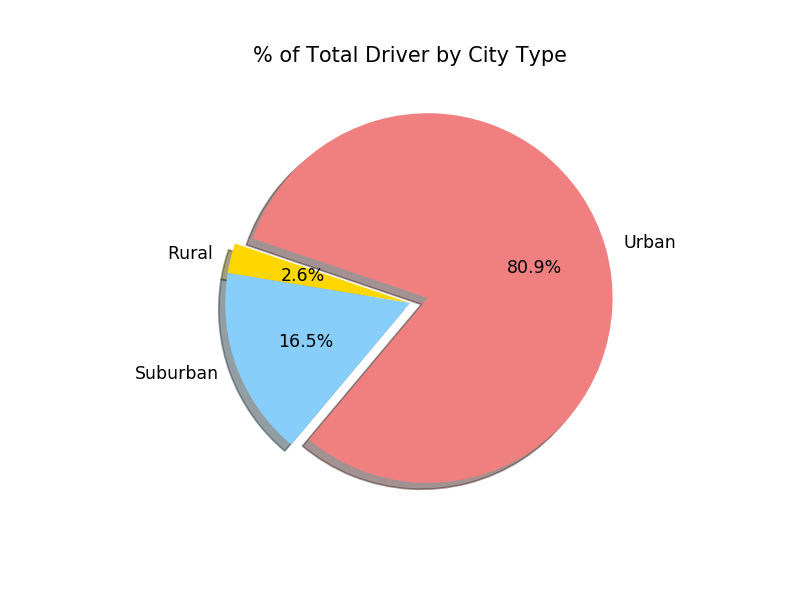

In [44]:
# Build Pie Charts
labels = 'Urban','Rural', 'Suburban', 
sizes = [urban_drpct,rural_drpct,suburban_drpct]
colors = ["lightcoral","gold","lightskyblue"]
explode = (0.1, 0, 0)  # only "explode" the Urban slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',colors=colors,
        shadow=True, startangle=230)
#ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('% of Total Driver by City Type')

# Save Figure
plt.savefig("./Images/Pyber_TotalDrivers_PieChart.png")

In [45]:
 # Show Figure
plt.show()